In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import scipy
import matplotlib.pyplot as plt
import warnings
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore")

In [115]:
df = pd.read_csv(("thanksgiving.csv"))


#Q1. Do you celebrate Thanksgiving?

#Q2. What is typically the main dish at your Thanksgiving dinner?

#Q3. How is the main dish typically cooked?
#Q4. What kind of stuffing/dressing do you typically have? 
#Q5. What type of cranberry saucedo you typically have?
#Q6. Do you typically have gravy?
#Q7. Corn Served
#Q8. Green Beans Served
#Q9. Mashed Potatoes Served
#Q10. Rolls/biscuits served
#Q11. Yams/sweet potato casserole served
#Q12. Apple Pie Served
#Q13. Pecan Pie served
#Q14. Pumpkin Pie served
#Q15. Do you typically pray before or after the Thanksgiving meal?
#Q16. Distance will travel
#Q17. Will you watch any of the following programs on Thanksgiving?
#Q18. What is the age cutoff at your kids table at Thanksgiving?
#Q19. Have you ever tried to meet up with hometown friends on Thanksgiving night?
#Q20. Have you ever attended a Friendsgiving?
#Q21. Will you shop any Black Friday sales on Thanksgiving Day?
#Q22. Do you work in retail?
#Q23. How would you describe where you live?
#Q24. Age
#Q25. What is your gender?
#Q26. How much total combined money did all members of your HOUSEHOLD earn last year?
#Q27. US Region

I got this data from https://www.statcrunch.com/app/index.php?dataid=2833634

There were some minor changes in the data set due to some errors in the columns in this data set.



A specified research question your model addresses:

My model will address whether the survey people's answers to the questions in the data set correlate well with "Have you ever tried to meet up with hometown friends on Thanksgiving night?". To do this, I will be testing 4 different types of models and comparing three other models and decide which model projects well to this question.


In [116]:
df.dtypes

Do you celebrate Thanksgiving?                                                     object
What is typically the main dish at your Thanksgiving dinner?                       object
How is the main dish typically cooked?                                             object
What kind of stuffing/dressing do you typically have?                              object
What type of cranberry saucedo you typically have?                                 object
Do you typically have gravy?                                                       object
Corn Served                                                                        object
Green Beans Served                                                                 object
Mashed Potatoes Served                                                             object
Rolls/biscuits served                                                              object
Yams/sweet potato casserole served                                                 object
Apple Pie 

In [117]:
#Renaming Columns to make it less cluttery
df.rename(index=str, columns={"Do you celebrate Thanksgiving?": "Q1", "What is typically the main dish at your Thanksgiving dinner?": "Q2", 
                             "How is the main dish typically cooked?": "Q3",
                             "What kind of stuffing/dressing do you typically have?": "Q4", "What type of cranberry saucedo you typically have?": "Q5",
                             "Do you typically have gravy?": "Q6", "Corn Served": "Q7", "Green Beans Served": "Q8", "Mashed Potatoes Served": "Q9", 
                              "Rolls/biscuits served": "Q10", "Yams/sweet potato casserole served": "Q11", "Apple Pie Served": "Q12", 
                              "Pecan Pie served": "Q13", "Pumpkin Pie served": "Q14", "Do you typically pray before or after the Thanksgiving meal?": "Q15",
                              "Distance will travel": "Q16", "Will you watch any of the following programs on Thanksgiving?": "Q17", 
                              "What is the age cutoff at your kids table at Thanksgiving?": "Q18", "Have you ever tried to meet up with hometown friends on Thanksgiving night?": "Q19",
                              "Have you ever attended a Friendsgiving?": "Q20", "Will you shop any Black Friday sales on Thanksgiving Day?": "Q21", 
                              "Do you work in retail?": "Q22", "How would you describe where you live?": "Q23", "Age": "Q24", "What is your gender?": "Q25",
                              "How much total combined money did all members of your HOUSEHOLD earn last year?": "Q26", "US Region": "Q27"}, inplace=True)

In [132]:
#This will avoid null values.
df['Q1'].fillna("NA",inplace = True) 
df['Q2'].fillna("NA",inplace = True)
df['Q3'].fillna("NA",inplace = True) 
df['Q4'].fillna("NA",inplace = True) 
df['Q5'].fillna("NA",inplace = True) 
df['Q6'].fillna("NA",inplace = True) 
df['Q7'].fillna("NA",inplace = True) 
df['Q8'].fillna("NA",inplace = True) 
df['Q9'].fillna("NA",inplace = True) 
df['Q10'].fillna("NA",inplace = True) 
df['Q11'].fillna("NA",inplace = True)
df['Q12'].fillna("NA",inplace = True) 
df['Q13'].fillna("NA",inplace = True) 
df['Q14'].fillna("NA",inplace = True)
df['Q15'].fillna("NA",inplace = True) 
df['Q16'].fillna("NA",inplace = True) 
df['Q17'].fillna("NA",inplace = True) 
df['Q18'].fillna("NA",inplace = True) 
df['Q19'].fillna("NA",inplace = True) 
df['Q20'].fillna("NA",inplace = True) 
df['Q21'].fillna("NA",inplace = True) 
df['Q22'].fillna("NA",inplace = True) 
df['Q23'].fillna("NA",inplace = True) 
df['Q24'].fillna("NA",inplace = True) 
df['Q25'].fillna("NA",inplace = True) 
df['Q26'].fillna("NA",inplace = True) 
df['Q27'].fillna("NA",inplace = True) 

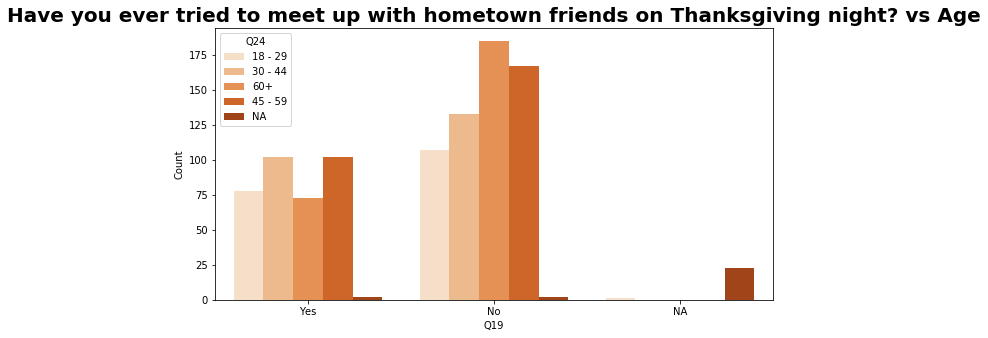

In [119]:
plt.figure(figsize=(10,5))
sns.countplot("Q19", hue="Q24", palette="Oranges",data=df)
plt.title("Have you ever tried to meet up with hometown friends on Thanksgiving night? vs Age",fontsize=20,fontweight="bold")
plt.xlabel("Q19")
plt.ylabel("Count")
plt.show()

More of the millennials like to meet up with friends during the holidays (to those who responded to Yes).

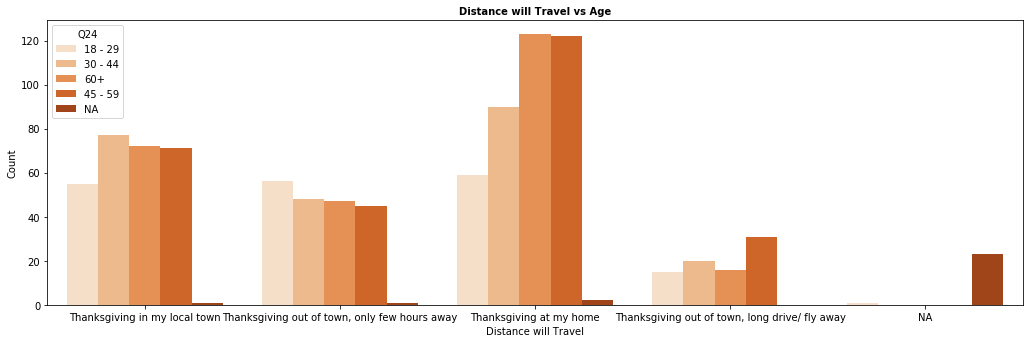

In [120]:
plt.figure(figsize=(10,5))
sns.countplot("Q16", hue="Q24", palette="Oranges",data=df)
plt.title("Distance will Travel vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Distance will Travel")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More millennials like to stay more at home for Thanksgiving and will not go out of their way to drive many hours for the holiday weekend.

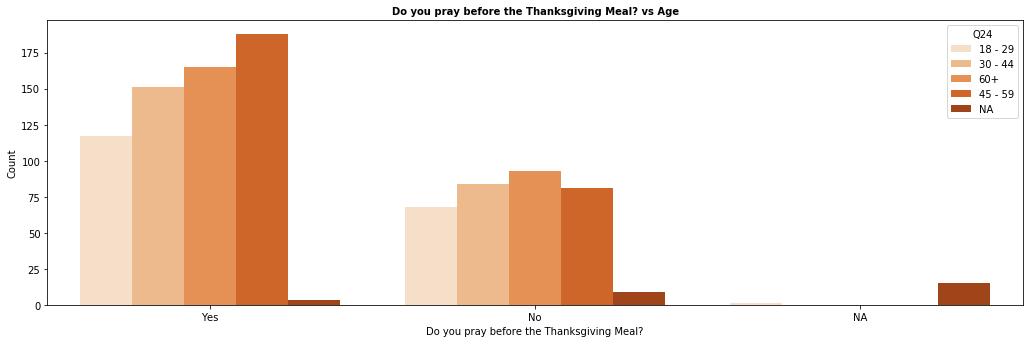

In [121]:
plt.figure(figsize=(10,5))
sns.countplot("Q15", hue="Q24", palette="Oranges",data=df)
plt.title("Do you pray before the Thanksgiving Meal? vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Do you pray before the Thanksgiving Meal?")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More older adults pray during thanksgiving meal that the younger demographic.

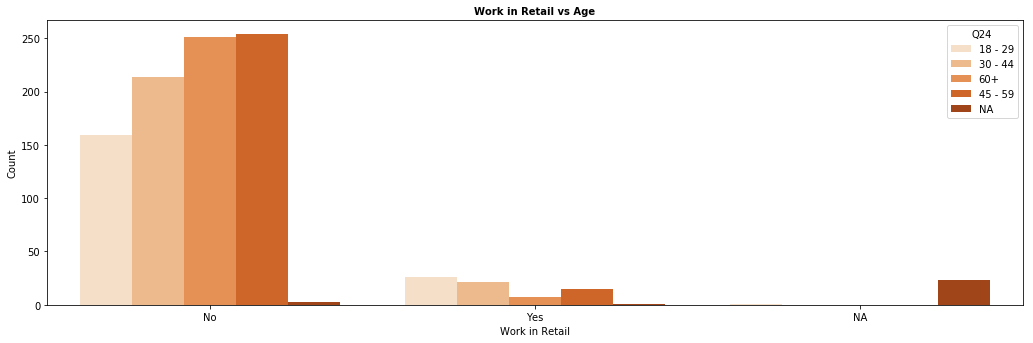

In [122]:
plt.figure(figsize=(10,5))
sns.countplot("Q22", hue="Q24", palette="Oranges",data=df)
plt.title("Work in Retail vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Work in Retail")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Most people in this survey do not work in retail especially older adults. However, to those who voted yes, it's no surprise most millennials work in the retail business.

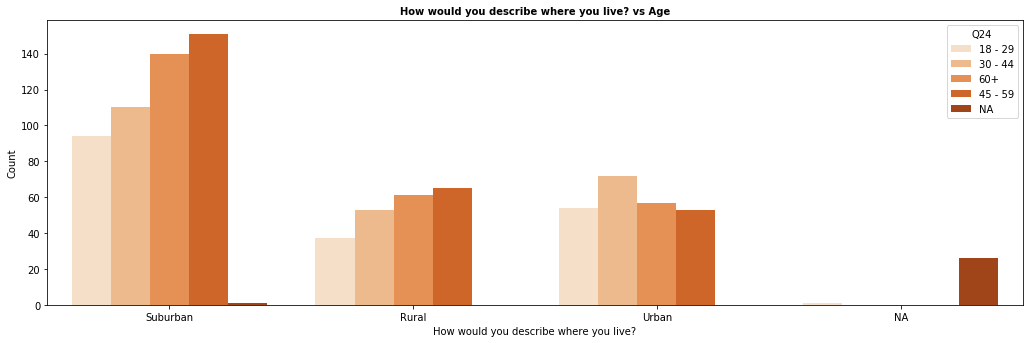

In [123]:
plt.figure(figsize=(10,5))
sns.countplot("Q23", hue="Q24", palette="Oranges",data=df)
plt.title("How would you describe where you live? vs Age",fontsize=10,fontweight="bold")
plt.xlabel("How would you describe where you live?")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Most people live in the suburban area based on this surveys. With Suburban and Rural, the age groups got older in both groups.

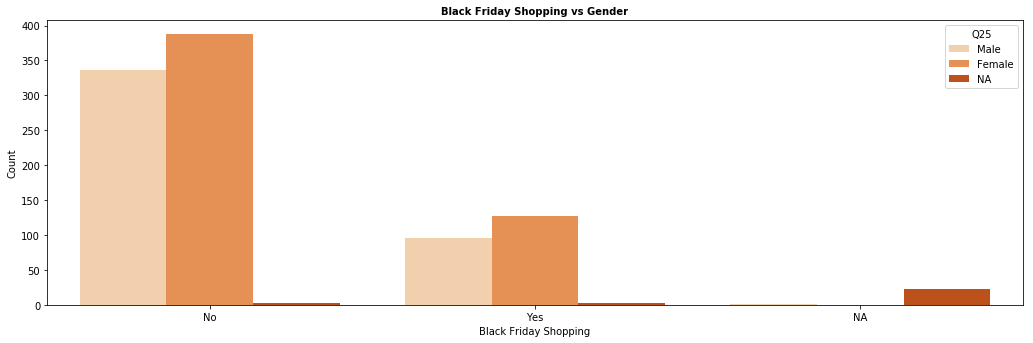

In [124]:
plt.figure(figsize=(10,5))
sns.countplot("Q21", hue="Q25", palette="Oranges",data=df)
plt.title("Black Friday Shopping vs Gender",fontsize=10,fontweight="bold")
plt.xlabel("Black Friday Shopping")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Although most people voted no, more females like to shop on black Friday.

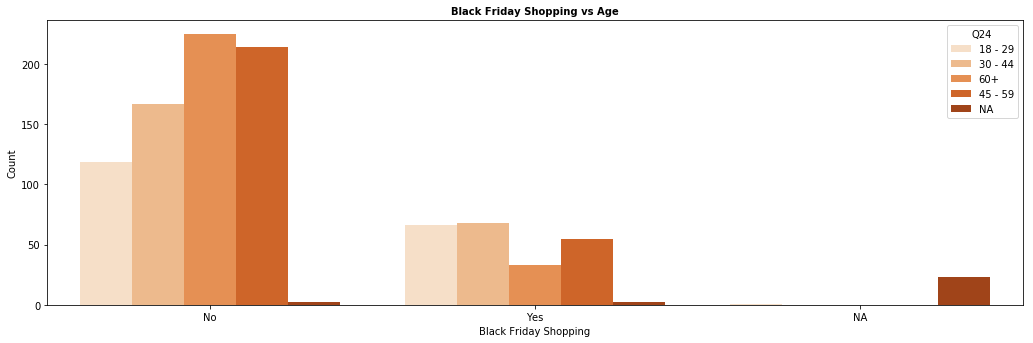

In [125]:
plt.figure(figsize=(10,5))
sns.countplot("Q21", hue="Q24", palette="Oranges",data=df)
plt.title("Black Friday Shopping vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Black Friday Shopping")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

To those who voted yes, the age of 45 or younger love Black Friday shopping.

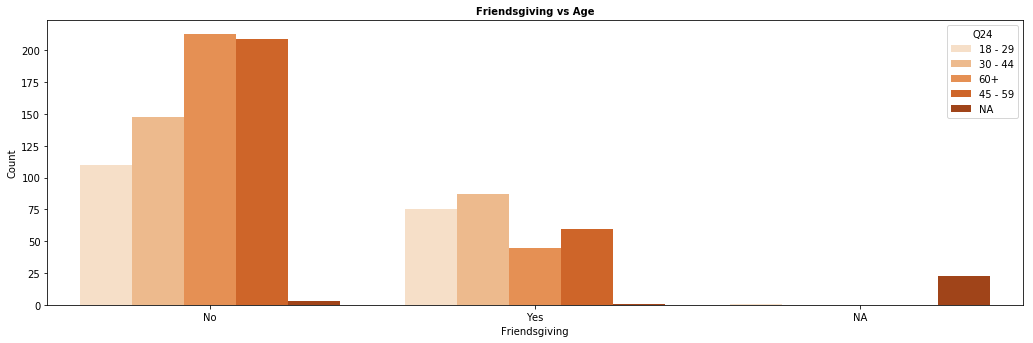

In [126]:
plt.figure(figsize=(10,5))
sns.countplot("Q20", hue="Q24", palette="Oranges",data=df)
plt.title("Friendsgiving vs Age",fontsize=10,fontweight="bold")
plt.xlabel("Friendsgiving")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

To those who voted yes, the age of 45 or younger love having Friendsgiving.

In [127]:
Q1= LabelEncoder()
Q2= LabelEncoder()
Q3= LabelEncoder()
Q4= LabelEncoder()
Q5= LabelEncoder()
Q6= LabelEncoder()
Q7= LabelEncoder()
Q8= LabelEncoder()
Q9= LabelEncoder()
Q10= LabelEncoder()
Q11= LabelEncoder()
Q12= LabelEncoder()
Q13= LabelEncoder()
Q14= LabelEncoder()
Q15= LabelEncoder()
Q16= LabelEncoder()
Q17= LabelEncoder()
Q18= LabelEncoder()
Q19= LabelEncoder()
Q20= LabelEncoder()
Q21= LabelEncoder()
Q22= LabelEncoder()
Q23= LabelEncoder()
Q24= LabelEncoder()
Q25= LabelEncoder()
Q26= LabelEncoder()
Q27= LabelEncoder()

df['Q1']=Q2.fit_transform(df['Q1'])
df['Q2']=Q2.fit_transform(df['Q2'])
df['Q3']=Q2.fit_transform(df['Q3'])
df['Q4']=Q4.fit_transform(df['Q4'])
df['Q5']=Q5.fit_transform(df['Q5'])
df['Q6']=Q6.fit_transform(df['Q6'])
df['Q7']=Q7.fit_transform(df['Q7'])
df['Q8']=Q8.fit_transform(df['Q8'])
df['Q9']=Q9.fit_transform(df['Q9'])
df['Q10']=Q10.fit_transform(df['Q10'])
df['Q11']=Q11.fit_transform(df['Q11'])
df['Q12']=Q12.fit_transform(df['Q12'])
df['Q13']=Q13.fit_transform(df['Q13'])
df['Q14']=Q14.fit_transform(df['Q14'])
df['Q15']=Q15.fit_transform(df['Q15'])
df['Q16']=Q16.fit_transform(df['Q16'])
df['Q17']=Q17.fit_transform(df['Q17'])
df['Q18']=Q18.fit_transform(df['Q18'])
df['Q19']=Q19.fit_transform(df['Q19'])
df['Q20']=Q20.fit_transform(df['Q20'])
df['Q21']=Q21.fit_transform(df['Q21'])
df['Q22']=Q22.fit_transform(df['Q22'])
df['Q23']=Q23.fit_transform(df['Q23'])
df['Q24']=Q24.fit_transform(df['Q24'])
df['Q25']=Q25.fit_transform(df['Q25'])
df['Q26']=Q26.fit_transform(df['Q26'])
df['Q27']=Q27.fit_transform(df['Q27'])


In [128]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,...,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.998974,7.435897,2.233846,0.407179,0.862564,1.913846,0.475897,1.700513,1.834872,1.782564,...,3.247179,1.341538,1.250256,1.205128,1.047179,1.965128,1.697436,0.499487,6.204103,4.568205
std,0.032026,1.703283,2.381630,1.050740,1.152439,0.284369,0.499675,0.464941,0.379687,0.420110,...,4.389346,0.523834,0.486931,0.460977,0.307052,0.757451,1.135458,0.552900,3.348416,3.004653
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,2.000000
50%,1.000000,8.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,7.000000,6.000000
75%,1.000000,8.000000,5.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,6.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000,9.000000,7.000000
max,1.000000,8.000000,5.000000,4.000000,4.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,12.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,11.000000,9.000000


Correlations

Text(0.5,1,'Thanksgiving Correlations')

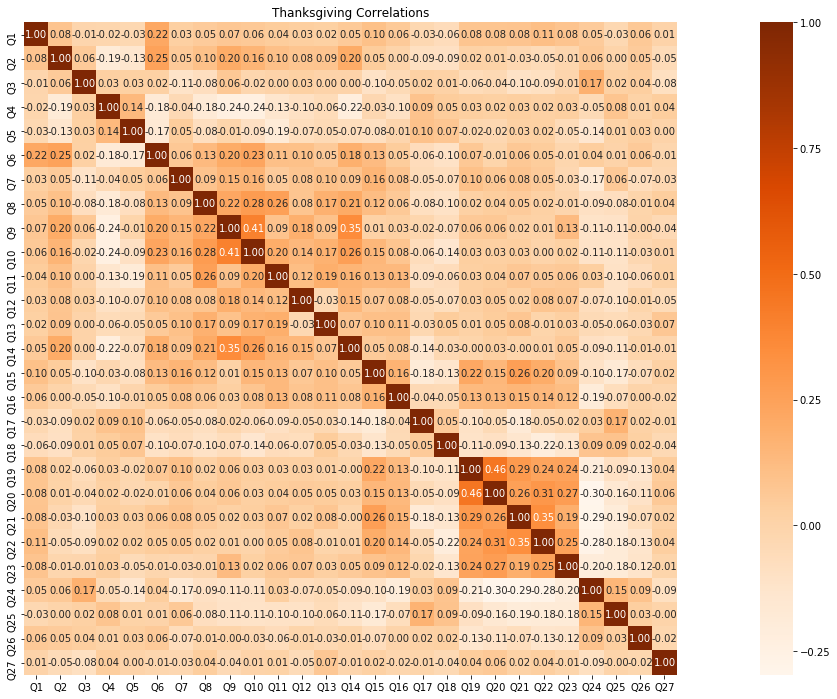

In [129]:
plt.figure(figsize=(30,12))
sns.heatmap(df.corr(),cmap = 'Oranges',annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Thanksgiving Correlations')

In [130]:
corr=df.corr()['Q19']
corr[np.argsort(corr,axis=0)[::-1]]

Q19    1.000000
Q20    0.457515
Q21    0.287811
Q23    0.242229
Q22    0.238023
Q15    0.217179
Q16    0.132764
Q7     0.100126
Q1     0.082102
Q6     0.066781
Q9     0.061881
Q27    0.042262
Q10    0.034552
Q4     0.032474
Q12    0.031643
Q11    0.029105
Q8     0.019936
Q2     0.015933
Q13    0.014395
Q14   -0.004231
Q5    -0.019105
Q3    -0.055031
Q25   -0.089789
Q17   -0.100138
Q18   -0.114896
Q26   -0.131096
Q24   -0.214466
Name: Q19, dtype: float64

I chose "Have you ever tried to meet up with hometown friends on Thanksgiving night?" as the correlation since it has the highest number"

In [131]:
X= df[['Q20', 'Q23', 'Q22', 'Q21', 'Q15', 'Q16']]
y=df['Q19']

I chose

Q15. Do you typically pray before or after the Thanksgiving meal?

Q16. Distance will Travel

Q20. Have you ever attended a Friendsgiving?

Q21. Will you shop any Black Friday sales on Thanksgiving Day?

Q22. Do you work in retail?

Q23. How would you describe where you live?

#They had the highest correlation against Q19. These variables will fit with my tests perfectly

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Logistic Regression

In [88]:
import timeit

%timeit pass

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("The Logistic Regression results are below:")
print("Accuracy:",lr_acc_score*100)
print("F1:",f1_score(y_test, lr_predict, average="macro")*100)
print("Precision:",precision_score(y_test,lr_predict, average="macro")*100)
print("Recall:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Cross Validation:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("\n")

print("Here is the confusion matrix below:\n",lr_conf_matrix)

12.7 ns ± 0.751 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Logistic Regression results are below:
Accuracy: 70.64846416382252
F1: 76.17447686413202
Precision: 78.37653942981561
Recall: 75.92682270648372
Cross Validation: [71.92982456 70.04405286 64.31718062]


Here is the confusion matrix below:
 [[ 11   0   0]
 [  0 152  25]
 [  0  61  44]]


Gradient Boosting Classifier

In [89]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

12.8 ns ± 0.29 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Gradient Boosting Classifier results are below:
Accuracy: 71.33105802047781
F1: 76.7285587975243
Precision 79.01612573994692
Recall: 76.4326069410815
Cross Validation: [71.05263158 69.60352423 63.43612335]


Here is the confusion matrix below:
 [[ 11   0   0]
 [  0 153  24]
 [  0  60  45]]


Random Forest Classifier

In [90]:
%timeit pass

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print('\n')
print("The Random Forest Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_rfc )*100)
print("F1:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Cross Validation:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_rfc))

12.5 ns ± 0.221 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Random Forest Classifier results are below:
Accuracy: 69.28327645051195
F1: 74.20731707317073
Precision: 77.40619695472625
Recall: 74.26957223567393
Cross Validation: [67.54385965 68.72246696 59.91189427]


Here is the confusion matrix below:
 [[ 11   0   0]
 [  0 155  22]
 [  0  68  37]]


Support Vector Classifier

In [91]:
%timeit pass

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print('\n')
print("The Support Vector Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_svc )*100)
print("F1:",f1_score(y_test, pred_svc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_svc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Cross Validation:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_svc))

12.7 ns ± 0.258 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The Support Vector Classifier results are below:
Accuracy: 72.35494880546075
F1: 78.2813948513157
Precision: 79.5874587458746
Recall: 77.90153349475383
Cross Validation: [71.92982456 72.24669604 67.40088106]


Here is the confusion matrix below:
 [[ 11   0   0]
 [  0 149  28]
 [  0  53  52]]


How you chose your model specification and what alternatives you compared it to:

Gradient Boosting, Random Forest, Support Vector Classifier, and Logistic Regression were the models I chose for this based on the lessons I read. I checked on all those 4 models to determine which model would fit accurately with my model.

Random Forest had the lowest accuracy score of 69.28%, Logistic Regression had the second lowest accuracy rate at 70.65%, and Gradient Boosting had a decent accuracy score at 71.33%.

The Support Vector Classifier had the highest accuracy score of 72.35% and the cross-validation score for that model was the highest out of the 4. The trend I noticed with these models is scores are higher when the cross-validation scores are higher.

The practical uses of your model for an audience of interest:

The purpose of the dataset was to see how everything correlated together and it seems most friends who try to meet up with other friends on Thanksgiving enjoy Black Friday shopping and those type of people work in the retail business. These surveys can inspire other people to try out other activities during that holiday season. 

Any weak points or shortcomings of your model:

The correlations in the variables (even after trying to drop to variables) did not correlate high with all of the other ones.  While the accuracy rate was still decent for Logistic Regression, it may have gone higher if some of the respondents actually were honest during the survey (only 1 respondent said they did not celebrate Thanksgiving, for example).
